In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv("cleandata.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   P_NAME                 2026 non-null   object 
 1   P_PERIOD               2026 non-null   float64
 2   S_NAME                 2026 non-null   object 
 3   S_DEC                  2026 non-null   float64
 4   S_MAG                  2026 non-null   float64
 5   S_MASS                 2026 non-null   float64
 6   S_TEMPERATURE          2026 non-null   float64
 7   P_DISTANCE             2026 non-null   float64
 8   P_FLUX                 2026 non-null   float64
 9   P_TEMP_EQUIL           2026 non-null   float64
 10  P_TYPE                 2023 non-null   object 
 11  S_RADIUS_EST           2026 non-null   float64
 12  S_TYPE_TEMP            2026 non-null   object 
 13  S_LUMINOSITY           2026 non-null   float64
 14  P_TYPE_TEMP            2026 non-null   object 
 15  P_HA

Unhabitable count:  1979
Conservatively habitable count:  20
Optimistically habitable count:  27


<AxesSubplot:xlabel='S_TEMPERATURE', ylabel='Count'>

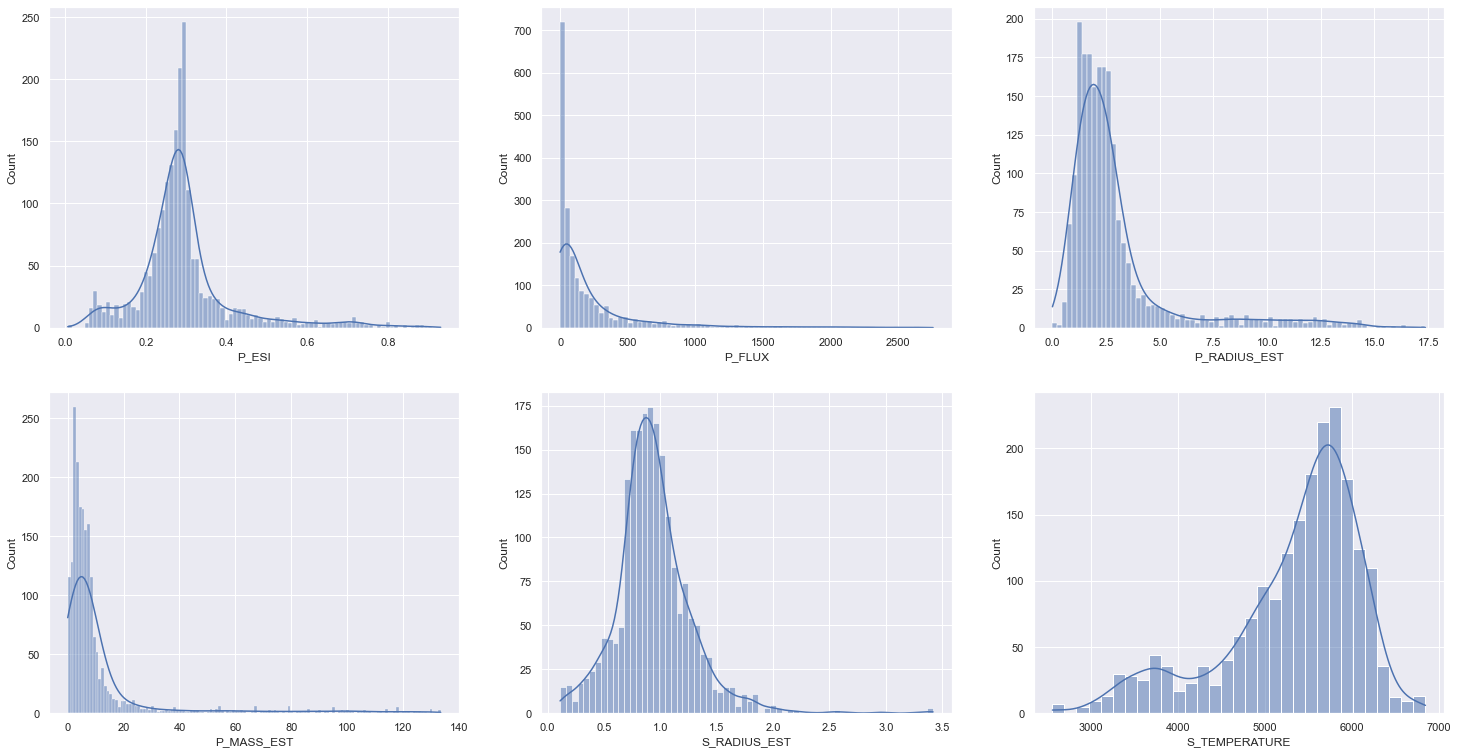

In [10]:
#Univariate explorations
f, axes = plt.subplots(2, 3, figsize=(25, 13))

#Planet habitability count
unhab=0; hab=0; vhab=0
for i in data["P_HABITABLE"] :
    if(i==0) :
        unhab+=1
    elif(i==1) :
        hab+=1
    elif(i==2) :
        vhab+=1
print("Unhabitable count: ",unhab)
print("Conservatively habitable count: ",hab)
print("Optimistically habitable count: ",vhab)

sb.histplot(data=data, x="P_ESI", kde=True, ax=axes[0,0])
sb.histplot(data=data, x="P_FLUX", kde=True, ax=axes[0,1])
sb.histplot(data=data, x="P_RADIUS_EST", kde=True, ax=axes[0,2])
sb.histplot(data=data, x="P_MASS_EST", kde=True, ax=axes[1,0])
sb.histplot(data=data, x="S_RADIUS_EST", kde=True, ax=axes[1,1])
sb.histplot(data=data, x="S_TEMPERATURE", kde=True, ax=axes[1,2])

<AxesSubplot:>

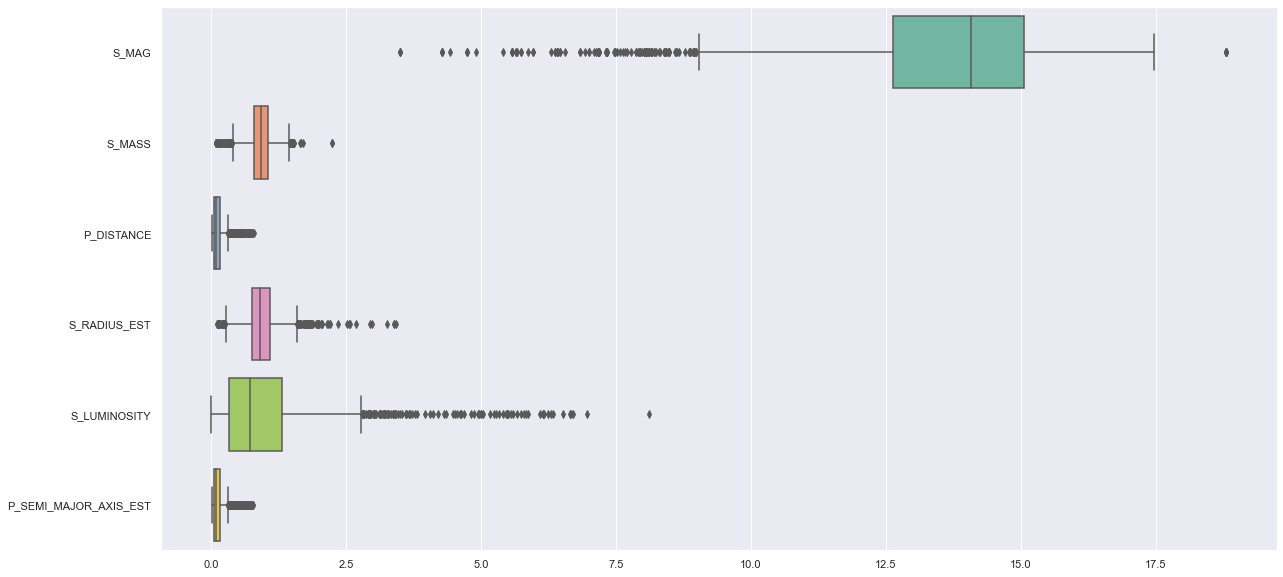

In [4]:
f, axes = plt.subplots(1,1, figsize=(20, 10))
sb.boxplot(data=data[["S_MAG", "S_MASS", "P_DISTANCE", 
                     "S_RADIUS_EST", "S_LUMINOSITY", "P_SEMI_MAJOR_AXIS_EST"]], 
                orient="h", palette="Set2", ax=axes)

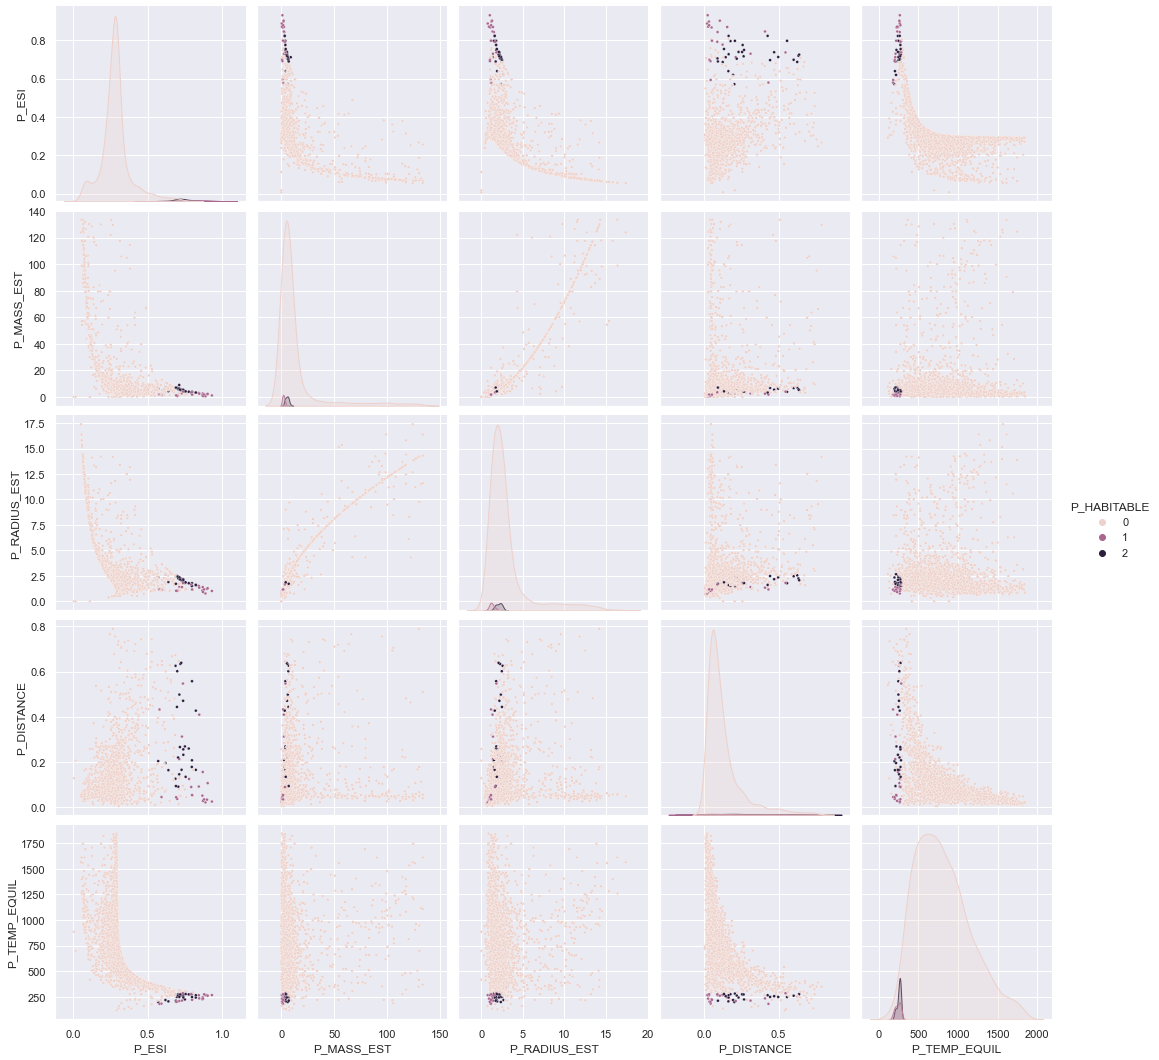

In [5]:
#Multivariate EDA
sb.pairplot(data, hue='P_HABITABLE', 
            vars=['P_ESI', 'P_MASS_EST', 'P_RADIUS_EST', 'P_DISTANCE', 'P_TEMP_EQUIL'], 
            diag_kind='kde', height=3, plot_kws={"s": 8})

In [6]:
#Using P_HABITABLE as a hue indicator for habitable data points, we can see that 
#P_RADIUS_EST, P_MASS_EST and P_TEMP_EQUIL show more dense clusters of the habitable and ()

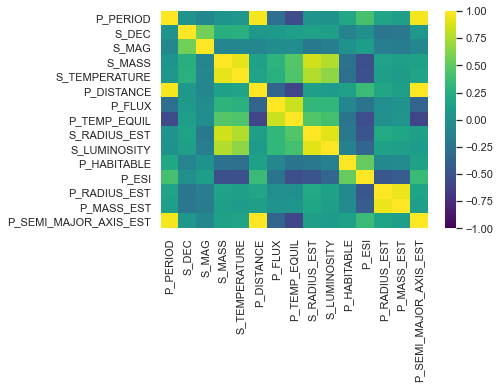

In [7]:
heatmap = sb.heatmap(data.corr(), vmin=-1,vmax=1, cmap='viridis')
#Feature such as P_DISTANCE, P_PERIOD and P_SEMI_MAJOR_AXIS_EST are strongly correlated because there are
#physical relationships and/or mathematical formulas governing relationships between the features.
#Same applies to stellar characteristics as seen in S_MASS, S_TEMPERATURE and S_LUMINOSITY

In [8]:
#Example plot to show discrete physical relationships between planetary/stellar characteristics

sb.jointplot(data=data, x="S_MASS", y="S_TEMPERATURE", ax=axes[0])
sb.jointplot(data=data, x="P_MASS_EST", y="P_RADIUS_EST", ax=axes[1])

TypeError: 'AxesSubplot' object is not subscriptable